<CENTER><h1>DAV 6150 Module 2 Assignment (Cross Validation)</CENTER></h1>

<h5><CENTER>TEAM CONTRIBUTOR: ABULLA MAMUN, RACHAEL OJOPAGOGO, MAPALO LUKASHI</CENTER></h5>

# Introduction

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.[Dataset](https://archive.ics.uci.edu/dataset/10/automobile)

__Feature Description:__

| Feature Name     | Feature Description      |
| :--------------- | :-----------------------:|
|symboling        |-3, -2, -1, 0, 1, 2, 3    |
|fuel-type         |diesel, gas               |
|aspiration        |std, turbo                |
|num-of-doors      |four, two                 |
|body-style        |hardtop, wagon, sedan, hatchback, convertible|
|drive-wheels      |4wd, fwd, rwd             |
|engine-location   |front, rear               |
|wheel-base        |continuous from 86.6 120.9|
|length            |continuous from 141.1 to 208.1.|
|width             |continuous from 60.3 to 72.3.|
|height            |continuous from 47.8 to 59.8.|
|normalized-losses |  continuous from 65 to 256.|
|make              | alfa-romero, audi, bmw, chevrolet, more.|
|curb-weight       | Unique customer identifier|
|engine-type       | dohc, dohcv, l, ohc, ohcf, ohcv, rotor|
|engine-size       |continuous from 61 to 326 |
|num-of-cylinders  |eight, five, four, six, three, twelve, two.|
|fuel-system       |1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi|
|bore              |continuous from 2.54 to 3.94.|
|stroke            |continuous from 2.07 to 4.17.|
|compression-ratio |continuous from 7 to 23. |
| horsepower       |continuous from 48 to 288.|
| peak-rpm         |continuous from 4150 to 6600.|
|city-mpg          |continuous from 13 to 49.|
|highway-mpg       |continuous from 16 to 54.|
|price             |continuous from 5118 to 45400|


## Problem Statement

The primary task of this project is to construct a pair of cross-validated linear regression models that predict the weight of a vehicle. The cross-validated performance of the two models is then compared to identify the preferred model to predict unseen data. 
The __curb-weight__ variable will serve as the response variable for our regression model. The explanatory variables may choose from are as follows: __height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg__.

## Methodology

To solve this task, we have to follow some steps. The guidelines or steps includes:

- Load the data into github and from github to load into jupyter notebook with python library pandas CSV reader function.
- Read the data types, structure, shape, number of features, observations, dataset details information and descriptive statistics. 
- Further we will continue data exploration as EDA.
- After having a bit knowledge about data then can do start data wrangling, checking missing data and their imputation.
- Then we preprocess the data as converting categorical into dummy variables, feature selection where we have to choose best features which have higher correlation with response variable. 
- And when data is cleaned and ready to feed into the machine then can start to split the data into train test set, so we can test our unseen data using train data used model.
- Though one time data training does not guaranty that model is providing accurate result, so we will use cross validation technique on training dataset and from there choose the best model to predict the test data.
- Finally, in our task we will use two model to see the performance best compare.


## Data Loading & Manipulation

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd

# Import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Import filterwarnngs  from warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for Data preprocessing and ML model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Read the data 

In [2]:
# Read data with pandas csv read method from github and save it on a vaiable as car_data
car_df = pd.read_csv("https://raw.githubusercontent.com/mamun21616/DAV-6150/main/M2_Data.csv", header = None)

# Display first five observations from the whole dataset
car_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


The dataset loaded as without header or attributes name. We have to set name of each attribute.

In [3]:
# To assign column names to the dataset 
# Create the headers
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style",
        "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type",
        "num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm",
        "city-mpg","highway-mpg","price"]

In [4]:
# Save the headers as the names of the columns in the dataset
car_df.columns=headers 

car_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
# Check the shape of data (number of rows and column)
car_df.shape

(205, 26)

The dataset contains 205 rows and 26 columns.

Now we will see the detailed description of the attributes of the dataset.

In [6]:
# Provides a concise summary of dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Dataset observation:

- This is a type of pandas Dataframe

- Index ranges from 0-204

- Total number of columns 26

- Out of 26 attributes ten are numerical and 16 are object type

- Dataset used computer memory 41.8+KB

- Notice that all attributes has 205 non-null values, meaning that there is no missing value

- Out of 16 object type variables some of them are not in correct format according to their column name. For example, price, number of cylinders and more. It should be numerical data type. May be data is not formatted well. We will further investigate about those variables.

__According to the project requirement we will take the subset of the dataframe with selected features only.__

In [7]:
car_data = car_df[["wheel-base","length","width","height","engine-size","horsepower","peak-rpm","city-mpg", "curb-weight"]]

In [8]:
car_data.columns

Index(['wheel-base', 'length', 'width', 'height', 'engine-size', 'horsepower',
       'peak-rpm', 'city-mpg', 'curb-weight'],
      dtype='object')

In [9]:
##to replace "?" with NaN
car_data=car_data.replace('?',np.NaN)

In [10]:
# Data types checking
car_data.dtypes 

wheel-base     float64
length         float64
width          float64
height         float64
engine-size      int64
horsepower      object
peak-rpm        object
city-mpg         int64
curb-weight      int64
dtype: object

In [11]:
#converting multiple columns into numeric
car_data[["horsepower","peak-rpm"]] = car_data[["horsepower","peak-rpm"]].apply(pd.to_numeric)

In [12]:
# Check the missing values
car_data.isnull().sum()

wheel-base     0
length         0
width          0
height         0
engine-size    0
horsepower     2
peak-rpm       2
city-mpg       0
curb-weight    0
dtype: int64

We have only 2 missing value each for horsepower and peak-rpm.We are going to replace the that value with the median value. We choose median because median is more robust than mean towards the outliers.

In [13]:
# Calculate the median
median=car_data[["horsepower", "peak-rpm"]].median()

# Fill the nan value with median value
car_data[["horsepower", "peak-rpm"]] = car_data[["horsepower", "peak-rpm"]].replace(np.nan, median)

## Summary of Statistics
We can explore statistical summary of our data to see the overview of the whole data in a table format and will explain more details about this table of data meaning. 

In [14]:
# Summary statistics can be obtained by using describe function
car_data.describe()

,wheel-base,length,width,height,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,126.907317,104.165854,5126.097561,25.219512,2555.565854
std,6.021776,12.337289,2.145204,2.443522,41.642693,39.529733,477.035772,6.542142,520.680204
min,86.600000,141.100000,60.300000,47.800000,61.000000,48.000000,4150.000000,13.000000,1488.000000
25%,94.500000,166.300000,64.100000,52.000000,97.000000,70.000000,4800.000000,19.000000,2145.000000
50%,97.000000,173.200000,65.500000,54.100000,120.000000,95.000000,5200.000000,24.000000,2414.000000
75%,102.400000,183.100000,66.900000,55.500000,141.000000,116.000000,5500.000000,30.000000,2935.000000
max,120.900000,208.100000,72.300000,59.800000,326.000000,288.000000,6600.000000,49.000000,4066.000000


- The count, mean, min, and max rows are self-explanatory. 
- The std row shows the standard deviation, which measures how dispersed the values are. 
- The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the car curb-weight lower than 2145. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).
- Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We can either plot this one attribute at a time, or can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute.  

- We will see next section for univariate analysis, bivariate analysis, multivariate analysis. 


# Exploratory Data Analysis (EDA)
Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. In this EDA process start with Univariate analysis, Bivariate analysis.

## Univariate Analysis

### Curb Weight

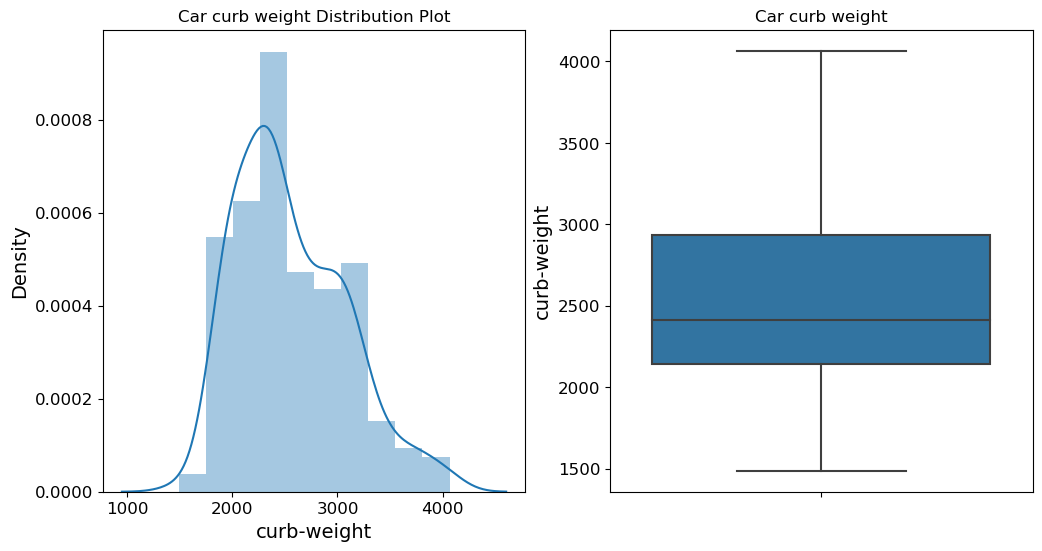

In [15]:
# Set the overall figure size
plt.figure(figsize=(12, 6))

# Set up a subplot with 1 row, 2 columns, and activate the first subplot
plt.subplot(1, 2, 1)

# Set the title for the first subplot
plt.title('Car curb weight Distribution Plot')

# Create a distribution plot for the 'curb-weight' column using Seaborn
sns.distplot(car_data['curb-weight'])

# Set up a subplot with 1 row, 2 columns, and activate the second subplot
plt.subplot(1, 2, 2)

# Set the title for the second subplot
plt.title('Car curb weight')

# Create a box plot for the 'curb-weight' column using Seaborn
sns.boxplot(y=car_data['curb-weight'])

# Display the subplots
plt.show();

In [16]:
print(car_data['curb-weight'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
85%      3101.000000
90%      3230.000000
100%     4066.000000
max      4066.000000
Name: curb-weight, dtype: float64


Inference :
- The plot seemed to be right-skewed, meaning that the most of the curb weight in the dataset are low(Below 2935).
- There is a significant difference between the mean and the median of the curb-weight distribution.
- The data points are far spread out from the mean, which indicates a high variance in the curb-weight.(85% of the curb-weights are below 3101, whereas the remaining 15% are between 3101 and 4066.)

### Displaying univariate analysis with graph for all numerical features

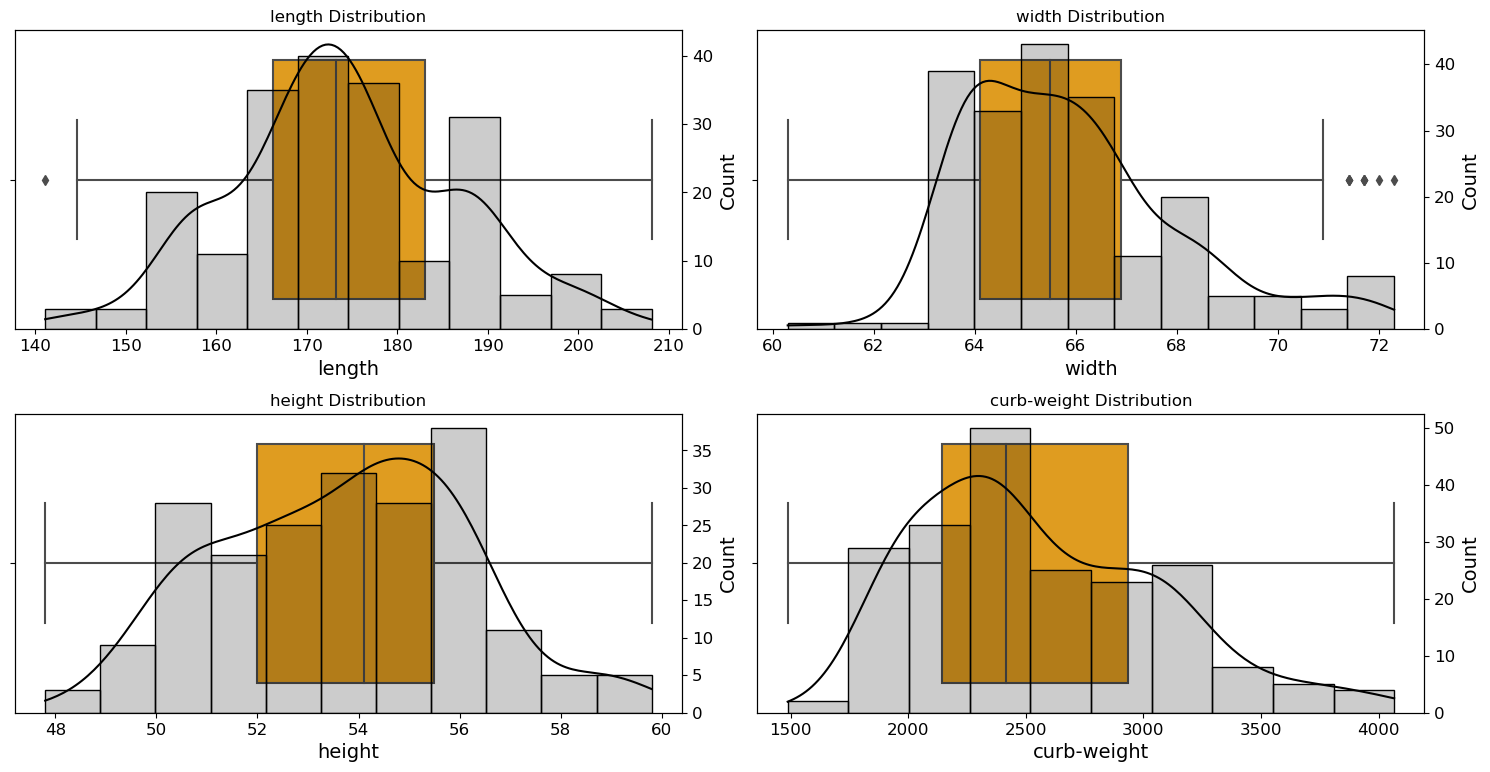

In [17]:
# Define a function to create subplots for box plots and histograms
def plot(x, fig):
    # Set up a subplot with 4 rows and 2 columns, and activate the specified subplot
    plt.subplot(4, 2, fig)
    
    # Box plot
    sns.boxplot(x=car_data[x], data=car_data, color='orange')
    
    # Create a twin axes for the histogram on the same subplot
    plt.twinx()
    
    # Histogram
    sns.histplot(x=car_data[x], data=car_data, kde=True, color='black', alpha=0.2)
    
    # Set title and labels for the subplot
    plt.title(x + ' Distribution')
    plt.xlabel(x)

# Set the overall figure size
plt.figure(figsize=(15, 15))

# Call the plot function for each specified variable
plot('length', 1)
plot('width', 2)
plot('height', 3)
plot('curb-weight', 4)

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show();


__Observations:__
We have tried to show the numerical data with histogram, KDE plot and box plot together where in one plot we can easily see the data distribution, the mean and standard deviation. From KDE plot, can identify the skewness of the data and from BOX plot we can see the outliers, quartile, median etc. Combination of these three plots,  we can get an overview of our numerical car data. Height and Curb-weight have no outliers but they are not normally distributed, its look like binomial distribution. Length variable looks normal distribution though it has few outliers. And finally width feature has few outliers, therefore its curve right sided skewed. continue..

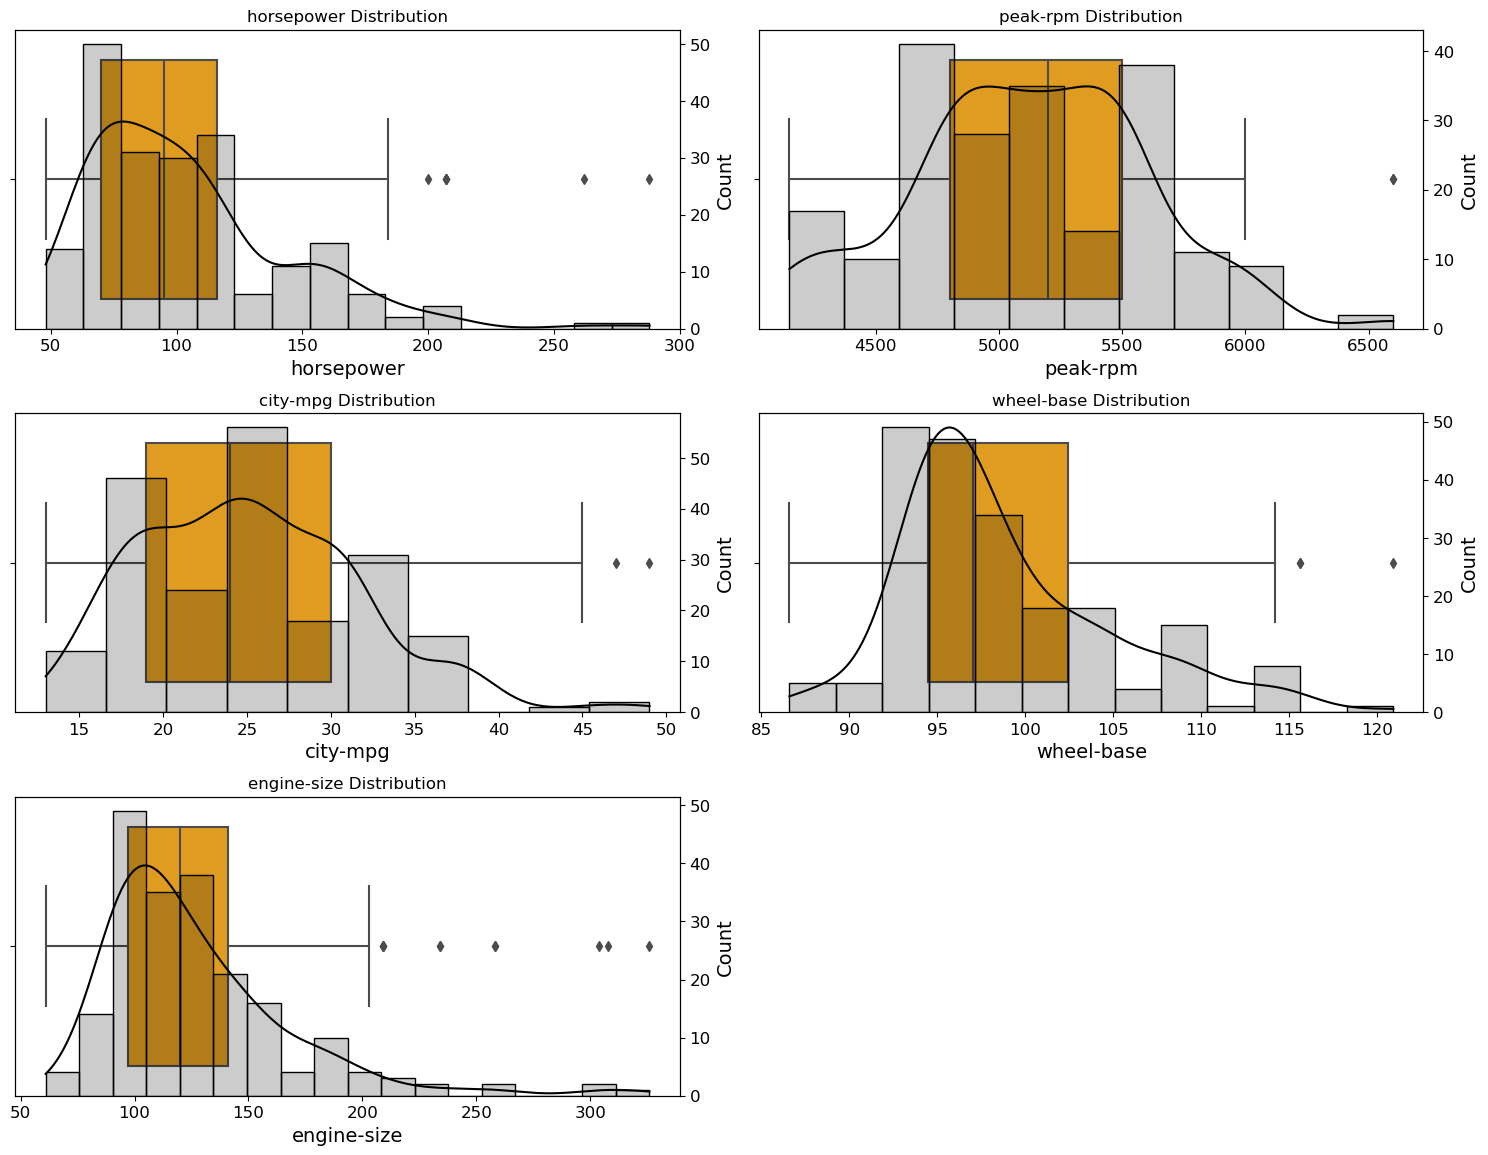

In [18]:
# Set the overall figure size
plt.figure(figsize=(15, 15))
plot('horsepower', 1)
plot('peak-rpm', 2)
plot('city-mpg', 3)
plot('wheel-base', 4)
plot('engine-size', 5)

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show();

Horsepower, wheel-base and  engine-size features have outliers, right skewed and nor normally distributed. And city-mpg, peak-rpm have very few outliers, so they are close to normal distribution. If we can remove the outlies, may be get normal distribution.

## Bivariate Analysis

### Showing the relationship for height, width, length, engine-size with curb-weight

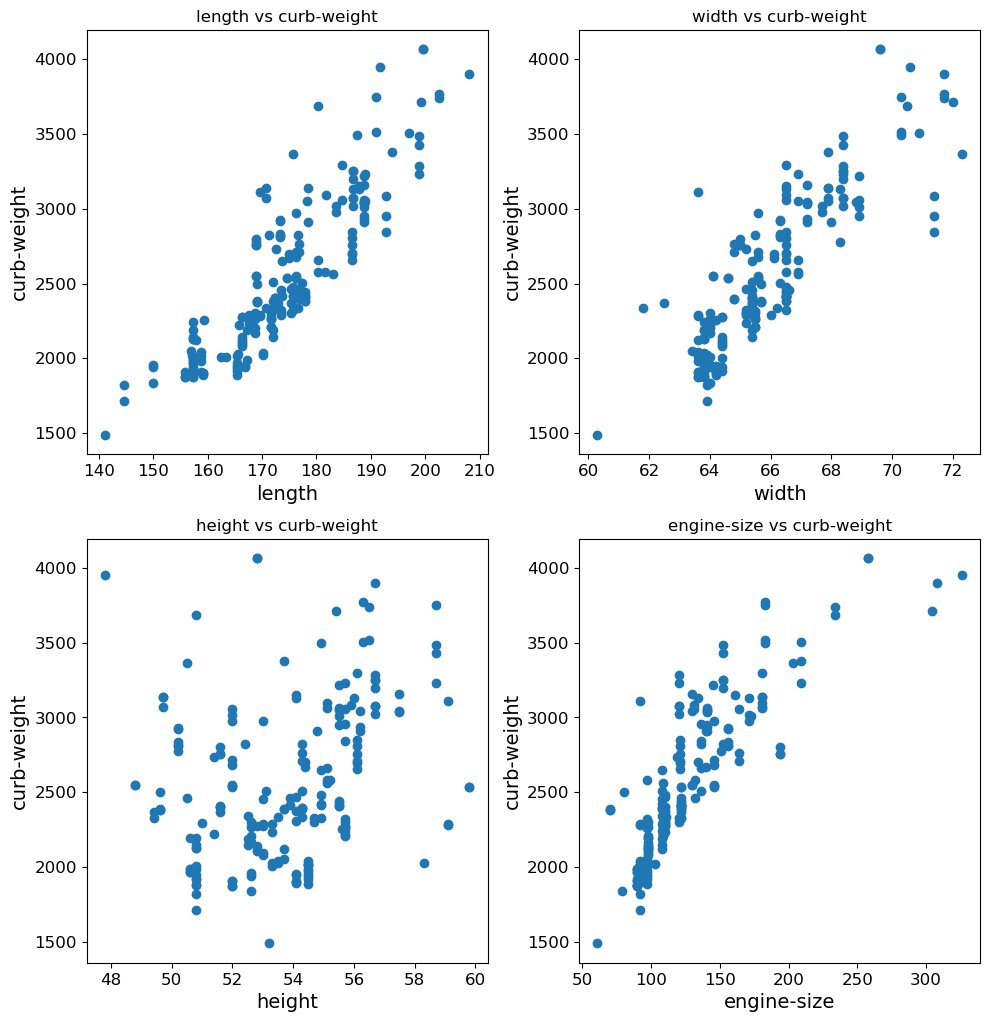

In [19]:
# Define a function to create scatter plots
def scatter(x, fig):
    # Set up a subplot with 4 rows and 2 columns, and activate the specified subplot
    plt.subplot(4, 2, fig)
    
    # Create a scatter plot
    plt.scatter(car_data[x], car_data['curb-weight'])
    
    # Set title and labels for the subplot
    plt.title(x + ' vs curb-weight')
    plt.ylabel('curb-weight')
    plt.xlabel(x)

# Set the overall figure size
plt.figure(figsize=(10, 20))

# Call the scatter function for each specified variable
scatter('length', 1)
scatter('width', 2)
scatter('height', 3)
scatter('engine-size', 4)

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show();

__Observation:__

- car width, car length and engine size seems to have a poitive correlation with curb weight.
- car height doesn't show any significant trend with curb weight.

### Displaying few regression plot to see the relationship by drawing line

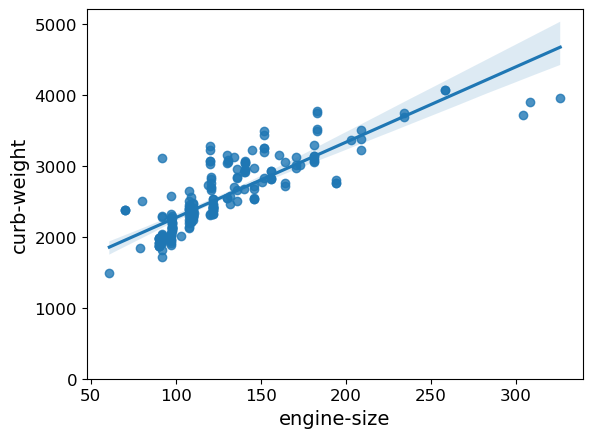

In [20]:
# Drawing scatterplot between engine size and curb-weight
# Engine size as potential predictor variable of curb-weight
sns.regplot(x="engine-size", y="curb-weight", data=car_data)
plt.ylim(0,);

The regression line moving upward to the right direction positively which described as engize size becomes bigger the curb-weight also increases. The larger engine size the higher curb weight. Most of the data points are close to the line. 

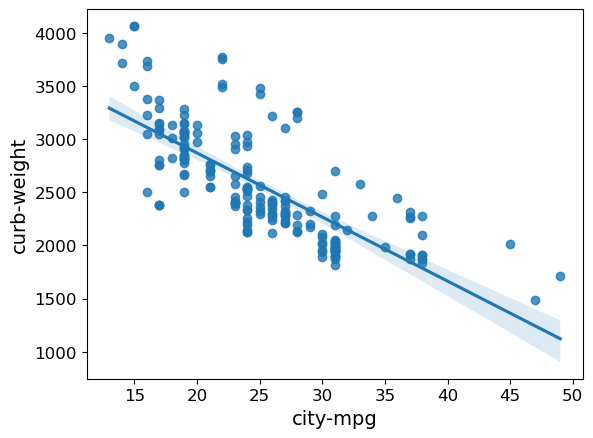

In [21]:
##lets see now the scatterplot between city-mpg and curb-weight to see if exists correlation
sns.regplot(x="city-mpg",y="curb-weight",data=car_data);

Yes, there is negative correlation between city-mpg and curb-weight. That is definitely tru because more you drive city-mpg will be less curb-weight and vice versa. 

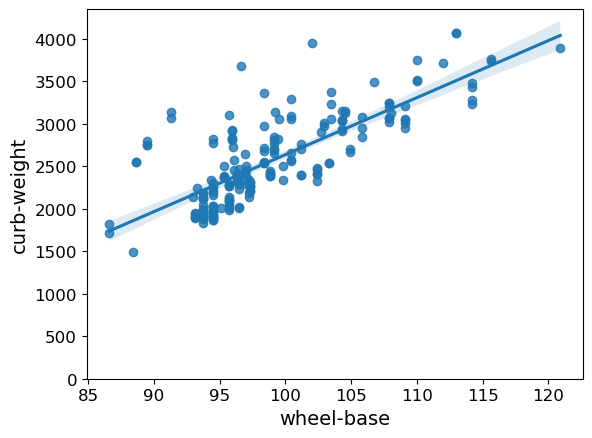

In [22]:
# relationship between wheel-base and curb-weight
sns.regplot(x="wheel-base", y="curb-weight", data=car_data)
plt.ylim(0,);

The regression line moving upward to the right direction positively which described as wheel-base becomes bigger the curb-weight also increases. The larger wheel-base the higher curb weight. Most of the data points are close to the line. 

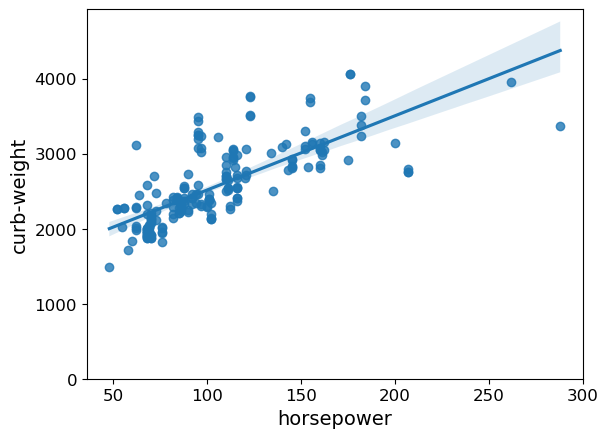

In [23]:
# relationship between horsepower and curb-weight
sns.regplot(x="horsepower", y="curb-weight", data=car_data)
plt.ylim(0,);

The regression line moving upward to the right direction positively which described as horsepower becomes bigger the curb-weight also increases. The larger horsepower the higher curb weight. Most of the data points are scatter from the line. It means not strongly correlated and have some outliers as well.

## Multivariate Analysis
To show the multivariate analysis we can show the correlation heatmap.

In [24]:
#Find the correlation between features and find the most correlated features with price
corr = car_data.corr()

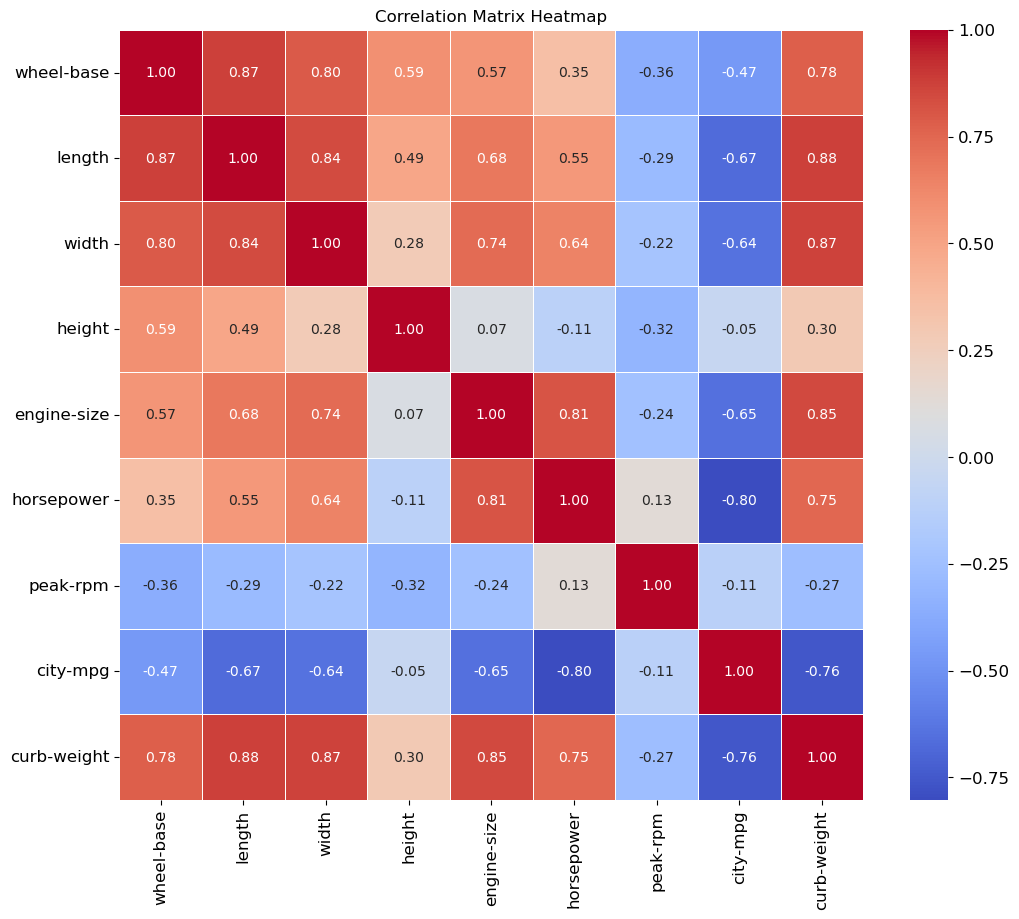

In [25]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# Set the title for the graph
plt.title('Correlation Matrix Heatmap')
plt.show();

We can easily find the top 5-6 attributes which shows the higher correlation value with curb-weight. Now, we shall look for Multicollinearity. Two variables are collinear if they are highly correlated. __Multicollinearlity__ happens when there is high correlation between predictors. This is a problem because Linear Regression doesn’t handle multicollinearity well.
In our case length and width variable shows Multicollinearity. 

## Data Preparation for Regression Model

In this step, we have to select minimum 3 features to predict curb- weight which are most important to predict the response variable. based on correlation plot, we will select top 5 features to predict our response variable. Use that information for our model.

In [26]:
# Drop width variable for multicollinearity, keep length only
car_data.drop('width', axis = 1, inplace= True)

__Select the best related features for our model prediction__
We will ignore the features which r value less than 0.5.

In [27]:
# Calculate the correlation matrix for the entire dataset
cols_to_drop = car_data.corr()

# Filter columns based on correlation with 'curb-weight'
# Select columns where correlation with 'curb-weight' is less than or equal to 0.5 and greater than or equal to -0.5
cols_to_drop = cols_to_drop[(cols_to_drop['curb-weight'] <= 0.5) & (cols_to_drop['curb-weight'] >= -0.5)]

# Reset the index to get a DataFrame with columns and their corresponding correlation values
cols_to_drop = cols_to_drop.reset_index()['index']

# Convert the resulting DataFrame to a list of column names to be dropped
cols_to_drop = list(cols_to_drop)

# Drop the selected columns from the car_data DataFrame
car_data.drop(cols_to_drop, axis=1, inplace=True)


In [28]:
# Show the selected features number
car_data.shape

(205, 6)

We have now only 6 attributes for our model building. As features contain values in different scales, so its time to make the value as standard scaler value, to get better model training and testing result.

__Checking there is any duplicate values or not ?__

In [29]:
# Check for duplicate rows in the DataFrame
duplicate_rows = car_data[car_data.duplicated()]

# Print the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Duplicate Rows:
     wheel-base  length  engine-size  horsepower  city-mpg  curb-weight
1          88.6   168.8          130       111.0        21         2548
11        101.2   176.8          108       101.0        23         2395
26         93.7   157.3           90        68.0        31         1989
44         94.5   155.9           90        70.0        38         1874
48        113.0   199.6          258       176.0        15         4066
56         95.3   169.0           70       101.0        17         2380
61         98.8   177.8          122        84.0        26         2385
62         98.8   177.8          122        84.0        26         2410
88         96.3   172.4          110       116.0        23         2403
116       107.9   186.7          152        95.0        28         3252
119        93.7   157.3           98       102.0        24         2128
120        93.7   157.3           90        68.0        31         1967
123       103.3   174.6          122        88.0

In [30]:
# Drop the duplicate values from the observations
car_data_unique= car_data.drop_duplicates(keep='first')
car_data_unique.shape

(190, 6)

__Removing Outliers__

Apply log transformation or winsorizing to reduce the impact of outliers.

In [31]:
# Example using winsorizing to limit extreme values
from scipy.stats import mstats

# Winsorize each column individually
car_data_no_outliers = car_data_unique.apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))
car_data_no_outliers.head()


,wheel-base,length,engine-size,horsepower,city-mpg,curb-weight
0,93.1,168.8,130,111.0,21,2548
2,94.5,171.2,152,154.0,19,2823
3,99.8,176.6,109,102.0,24,2337
4,99.4,176.6,136,115.0,18,2824
5,99.8,177.3,136,110.0,19,2507


__Standardization__

Standardizing the dataset (also known as z-score normalization) before splitting it into training and testing sets is a good practice. It helps ensure that the features have similar scales, which can be beneficial for certain machine learning algorithms. To that valid reason we will standardize our dataset before splitting it into training and testing sets using scikit-learn.

In [32]:
# 'X' is our feature matrix and 'y' is our target variable
X = car_data_no_outliers.drop('curb-weight', axis=1) 
y = car_data_no_outliers['curb-weight']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
# View the first 5 observations from x train data
X_train_scaled[:5]

array([[-0.6875098 , -0.485219  , -1.0759207 , -0.01927195, -1.38467046],
       [-0.44887652, -0.62297262, -0.4481282 , -0.46763965,  0.31403745],
       [ 0.06816225,  1.13109014, -0.10284232,  0.24974868, -0.7051873 ],
       [ 2.23574786,  1.52598385,  1.84331443,  0.63833402, -0.5353165 ],
       [ 0.72440376,  0.12089693, -0.0714527 , -0.28829257,  0.31403745]])

In [34]:
# View the first 5 observations from X test data
X_test_scaled[:5]

array([[-0.84659865, -0.78827696, -0.47951783, -0.34807493, -0.19557492],
       [ 1.10223979,  1.33312878,  0.52495018,  0.3693134 , -0.36544571],
       [-0.56819316, -0.09950886,  0.99579455,  1.29593999, -1.04492888],
       [ 2.23574786,  2.0861819 ,  2.47110694,  2.40191367, -1.55454125],
       [ 2.23574786,  2.0861819 ,  0.87023605, -0.19861903, -0.02570413]])

# Regression Model Construction & Evaluation

## Select and Train a Model
Training and Evaluating on the Training Set

In [35]:
# Model 1: Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg_model, X, y, scoring='neg_mean_squared_error', cv=10)
linear_reg_rmse_scores = np.sqrt(-linear_reg_scores)

print("Linear Regression RMSE scores:", linear_reg_rmse_scores)
print("Linear Regression Mean RMSE:", linear_reg_rmse_scores.mean())


# Model 2: Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_scores = cross_val_score(random_forest_model, X, y, scoring='neg_mean_squared_error', cv=10)
random_forest_tree_rmse_scores = np.sqrt(-random_forest_scores)

print("\nrandom_forest RMSE scores:", random_forest_scores)
print("random_forest Mean RMSE:", random_forest_tree_rmse_scores.mean())

Linear Regression RMSE scores: [162.87399607  55.10143765 116.69841722 155.5224127  136.93531295
 214.91435994 106.48341747 235.2340567  143.02969942 135.63754506]
Linear Regression Mean RMSE: 146.24306551893244

random_forest RMSE scores: [ -16143.85114978   -2856.52590867   -8327.85183897  -32815.13145897
  -17870.21242513 -106803.55393333  -38485.93162609  -49165.85854012
  -13916.89219314  -13576.03286578]
random_forest Mean RMSE: 156.579729853605


Here for cross validation choice, we have chosen cross validation value starting from 4 to 10 and we got best RMSE results for CV=10, That is the strongest reason to choose CV is 10.

__Linear Regression model results__

Linear Regression RMSE on test set: 203.93042670103324


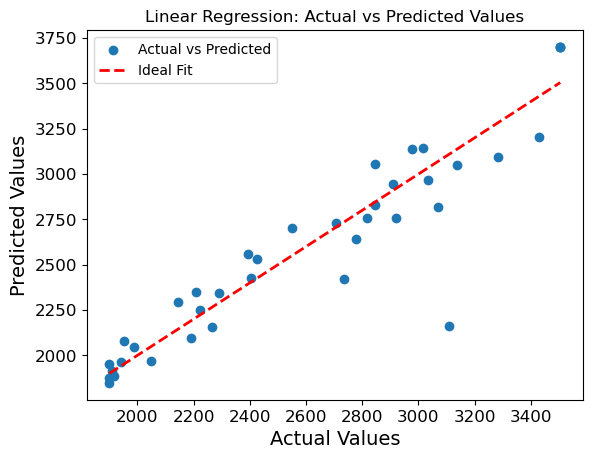

In [36]:
# Train Linear Regression model on the scaled dataset
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)

# Evaluate the performance on the test set
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
print("Linear Regression RMSE on test set:", linear_reg_rmse)

# Visualize actual vs predicted values
plt.scatter(y_test, linear_reg_predictions, label='Actual vs Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.legend()
plt.show();

__Random Forest Regressor model results__

random_forest_model_predictions RMSE on test set: 164.07893635578878


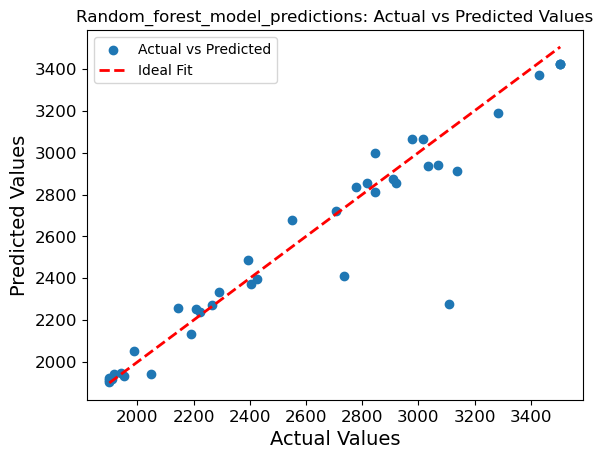

In [37]:
# Train Random forest model on the scaled train datset
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
random_forest_model_predictions = random_forest_model.predict(X_test_scaled)

# Evaluate the performance on the test set
random_forest_model_rmse = np.sqrt(mean_squared_error(y_test, random_forest_model_predictions))
print("random_forest_model_predictions RMSE on test set:", random_forest_model_rmse)

# Visualize actual vs predicted values
plt.scatter(y_test, random_forest_model_predictions, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random_forest_model_predictions: Actual vs Predicted Values")
plt.legend()
plt.show();

# Conclusion

In this project we have done exploratory data analysis, univariate, bivariate, multivariate, data preprocessing, outliers & duplicate data handling, feature scaling, cross validation technique for different model building. We have used 10 cross validation for the dataset, then run the model with accuracy metrics and find the average value.

We have operated two models, Linear regression and Random forest Regressor using accuracy metrics root mean square. Random Forest Regressor worked better on test set compare to Linear regression model. Predicted dotted red line touched most of the data points. 
If we go further Hyperparameter tuning, other model may be can reduce more outliers and get even better result. This project was limited to only two model with cross validation, therefor we we have to conclude here.
In future, If we get the opportunity to work on this project, we will dive more deep into it. 